In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import gc
import time
import pickle
import os

In [2]:
DATA_PATH = '../pkl/'

In [3]:
print('load data...')
invite_info = pd.read_pickle(os.path.join(DATA_PATH, 'invite_info.pkl'))
invite_info_evaluate = pd.read_pickle(os.path.join(DATA_PATH, 'invite_info_evaluate.pkl'))
data = pd.read_pickle(os.path.join(DATA_PATH, 'cbt_data.pkl'))
print(list(data.columns))

load data...
['iday', 'ihour', 'itime', 'label', 'qid', 'uid', 'invite_answer_gap', 'gender', 'freq', 'A1', 'B1', 'C1', 'D1', 'E1', 'A2', 'B2', 'C2', 'D2', 'E2', 'score', 'num_topic_a', 'num_topic_i', 'most_topic_i', 'min_topic_iv', 'max_topic_iv', 'mean_topic_iv', 'std_topic_iv', 'num_title_sw', 'num_title_w', 'num_desc_sw', 'num_desc_w', 'num_qtopic', 'qhour', 'inv_que_gap', 'num_topic_a_com', 'num_topic_i_com', 'min_topic_iv_com', 'max_topic_iv_com', 'mean_topic_iv_com', 'std_topic_iv_com', 'user_cnt', 'question_cnt', 'question_curr_expo', 'question_history_expo', 'question_future_expo', 'user_curr_expo', 'user_history_expo', 'user_future_expo', 'prev_excellent_sum', 'prev_recommend_sum', 'prev_figure_sum', 'prev_video_sum', 'prev_num_word_sum', 'prev_num_like_sum', 'prev_num_unlike_sum', 'prev_num_comment_sum', 'prev_num_favor_sum', 'prev_num_thank_sum', 'prev_num_report_sum', 'prev_num_nohelp_sum', 'prev_num_oppose_sum', 'prev_cnt_sum', 'prev_excellent_mean', 'prev_recommend_mean'

In [4]:
len_train = len(invite_info)
train = data[:len_train]
test = data[len_train:]

In [5]:
tr0 = train[train['label'] == 0]
tr1 = train[train['label'] == 1]

In [6]:
drop_feats = ['qid', 'uid', 'itime', 'label', 'iday', 'user_curr_expo', 'user_curr_expo_d']
used_feats = [f for f in train.columns if f not in drop_feats]
print(len(used_feats))
print(used_feats)

119
['ihour', 'invite_answer_gap', 'gender', 'freq', 'A1', 'B1', 'C1', 'D1', 'E1', 'A2', 'B2', 'C2', 'D2', 'E2', 'score', 'num_topic_a', 'num_topic_i', 'most_topic_i', 'min_topic_iv', 'max_topic_iv', 'mean_topic_iv', 'std_topic_iv', 'num_title_sw', 'num_title_w', 'num_desc_sw', 'num_desc_w', 'num_qtopic', 'qhour', 'inv_que_gap', 'num_topic_a_com', 'num_topic_i_com', 'min_topic_iv_com', 'max_topic_iv_com', 'mean_topic_iv_com', 'std_topic_iv_com', 'user_cnt', 'question_cnt', 'question_curr_expo', 'question_history_expo', 'question_future_expo', 'user_history_expo', 'user_future_expo', 'prev_excellent_sum', 'prev_recommend_sum', 'prev_figure_sum', 'prev_video_sum', 'prev_num_word_sum', 'prev_num_like_sum', 'prev_num_unlike_sum', 'prev_num_comment_sum', 'prev_num_favor_sum', 'prev_num_thank_sum', 'prev_num_report_sum', 'prev_num_nohelp_sum', 'prev_num_oppose_sum', 'prev_cnt_sum', 'prev_excellent_mean', 'prev_recommend_mean', 'prev_figure_mean', 'prev_video_mean', 'prev_num_word_mean', 'pre

--------------------------------------------------------------------------------
0 ihour


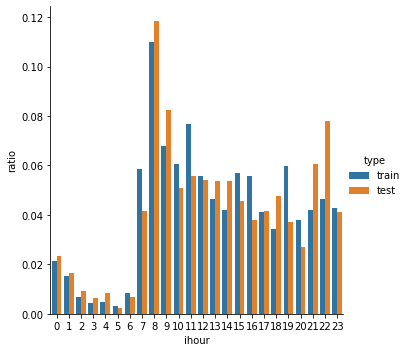

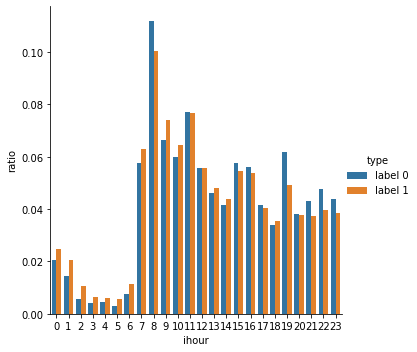

--------------------------------------------------------------------------------
1 invite_answer_gap


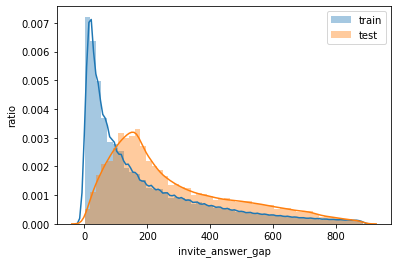

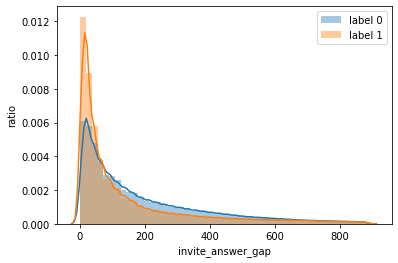

--------------------------------------------------------------------------------
2 gender


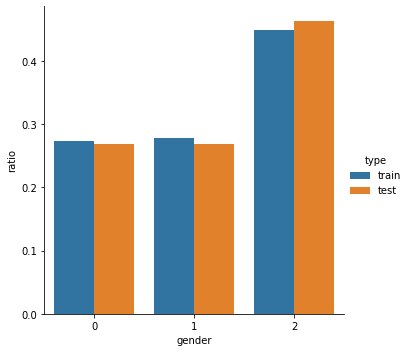

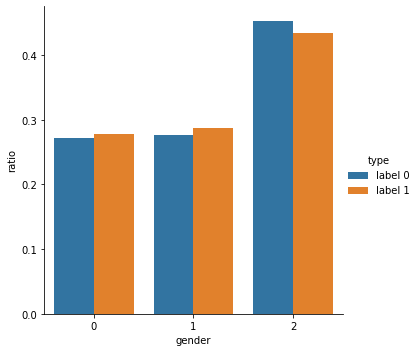

--------------------------------------------------------------------------------
3 freq


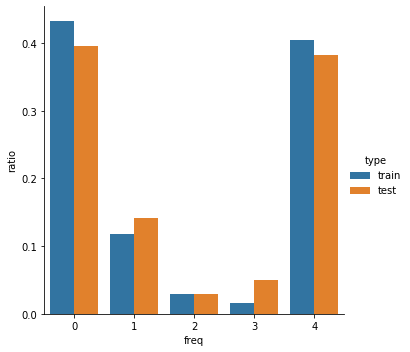

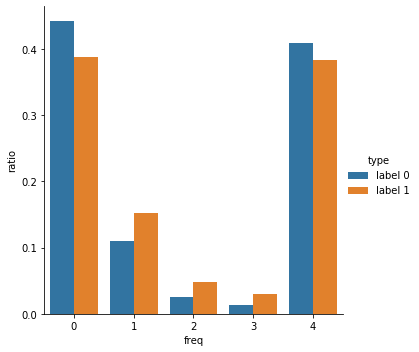

--------------------------------------------------------------------------------
4 A1


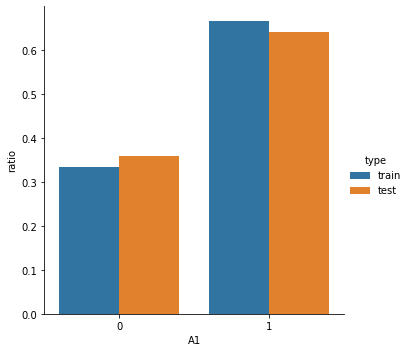

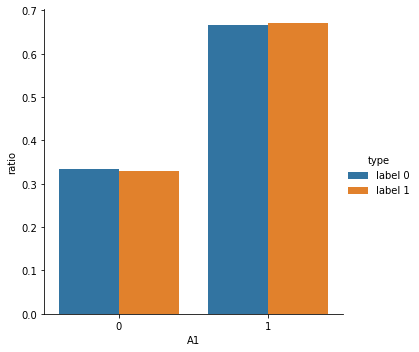

--------------------------------------------------------------------------------
5 B1


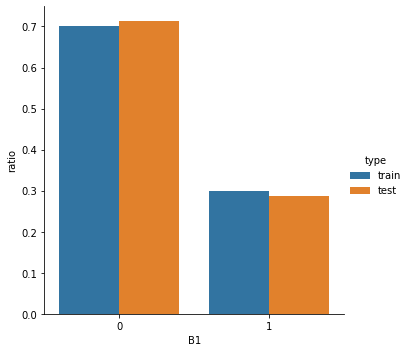

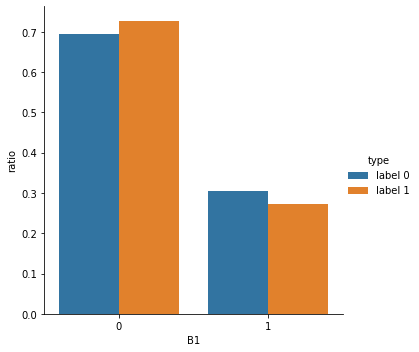

--------------------------------------------------------------------------------
6 C1


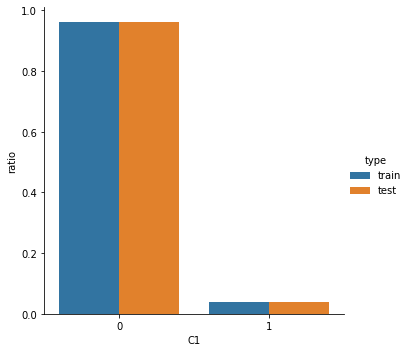

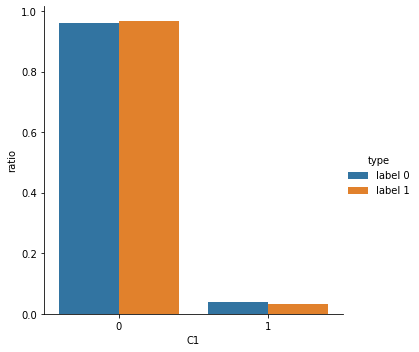

--------------------------------------------------------------------------------
7 D1


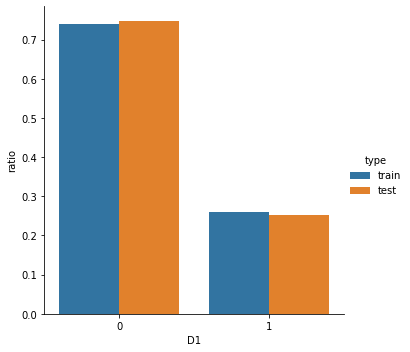

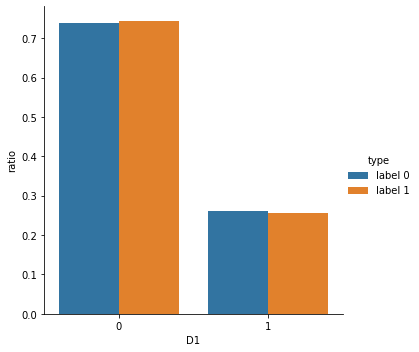

--------------------------------------------------------------------------------
8 E1


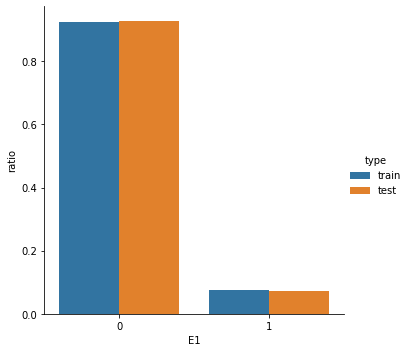

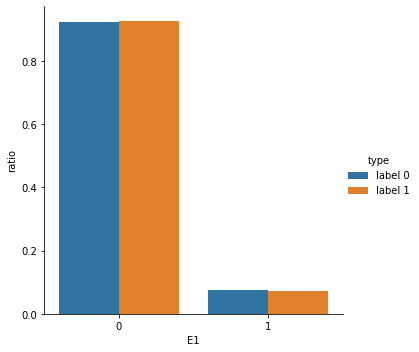

--------------------------------------------------------------------------------
9 A2


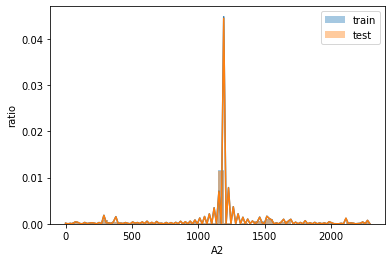

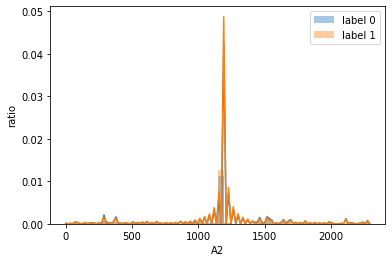

--------------------------------------------------------------------------------
10 B2


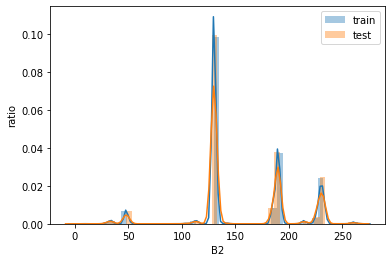

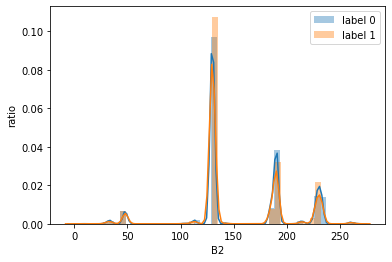

--------------------------------------------------------------------------------
11 C2


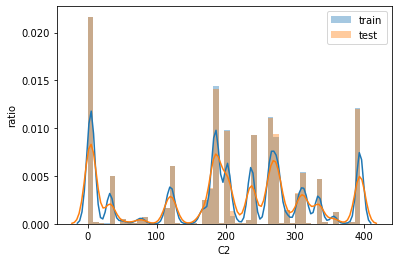

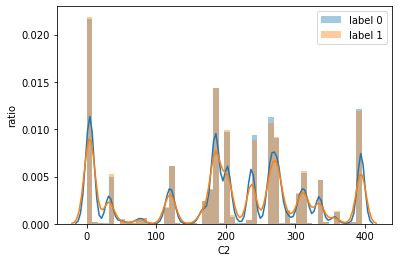

--------------------------------------------------------------------------------
12 D2


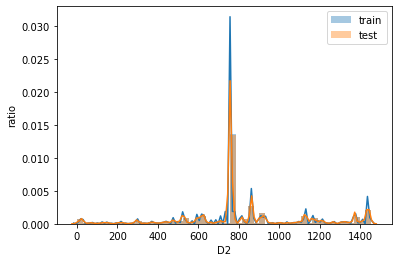

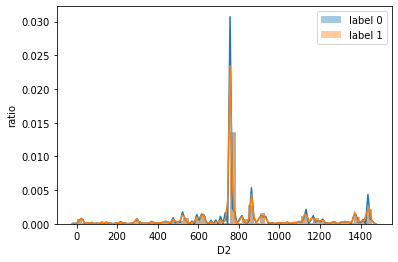

--------------------------------------------------------------------------------
13 E2


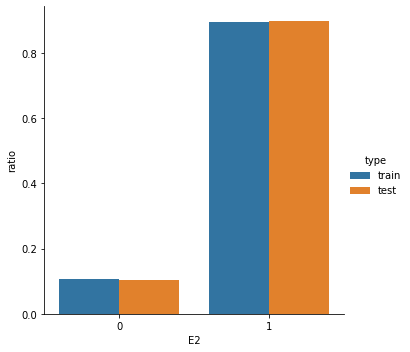

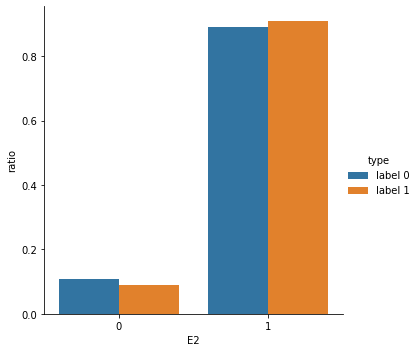

--------------------------------------------------------------------------------
14 score


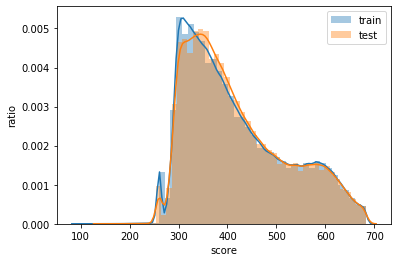

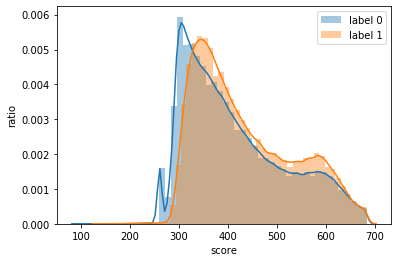

--------------------------------------------------------------------------------
15 num_topic_a


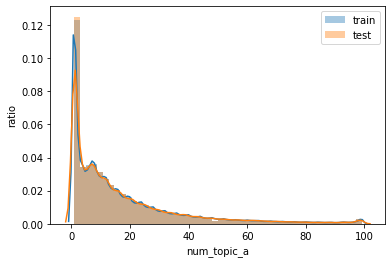

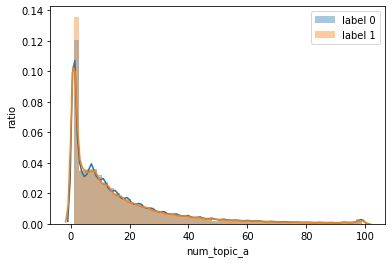

--------------------------------------------------------------------------------
16 num_topic_i


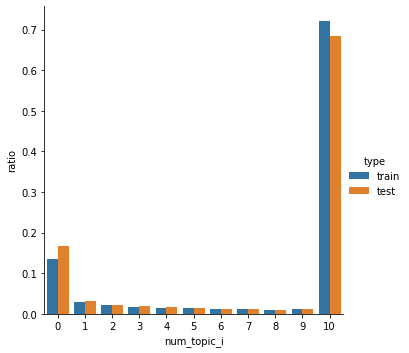

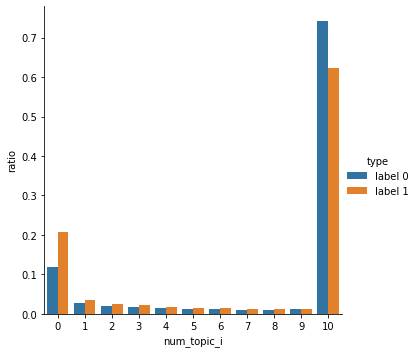

--------------------------------------------------------------------------------
17 most_topic_i


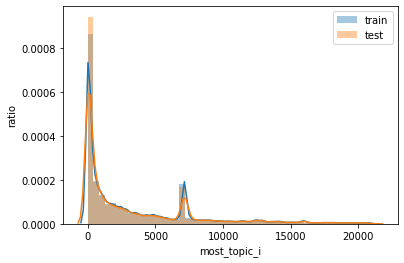

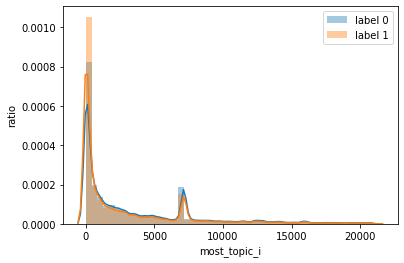

--------------------------------------------------------------------------------
18 min_topic_iv


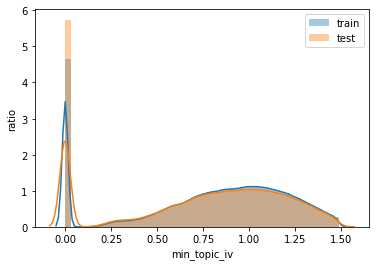

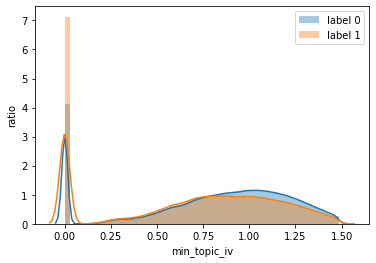

--------------------------------------------------------------------------------
19 max_topic_iv


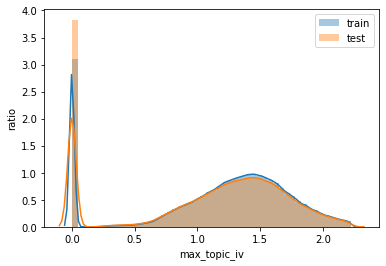

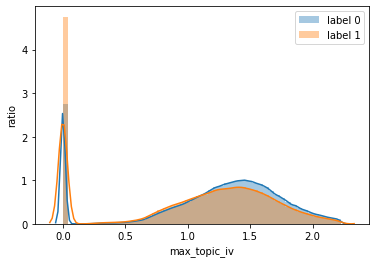

--------------------------------------------------------------------------------
20 mean_topic_iv


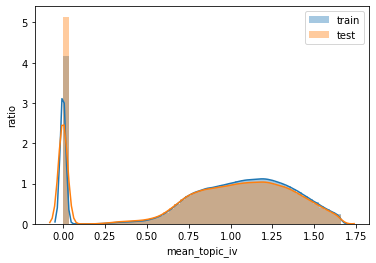

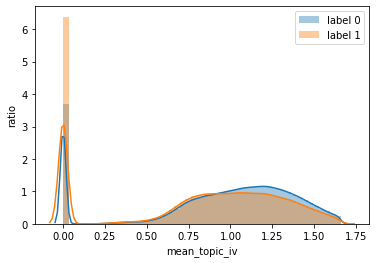

--------------------------------------------------------------------------------
21 std_topic_iv


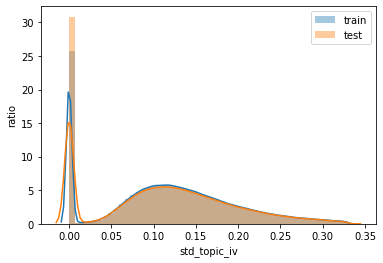

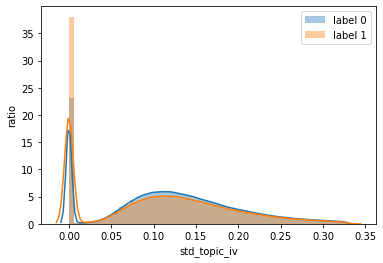

--------------------------------------------------------------------------------
22 num_title_sw


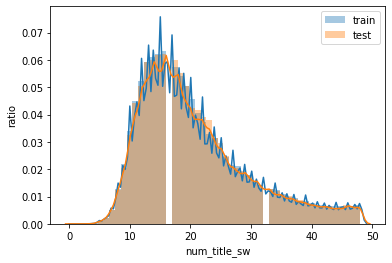

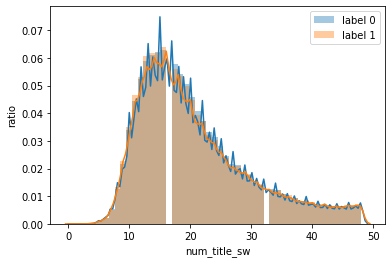

--------------------------------------------------------------------------------
23 num_title_w


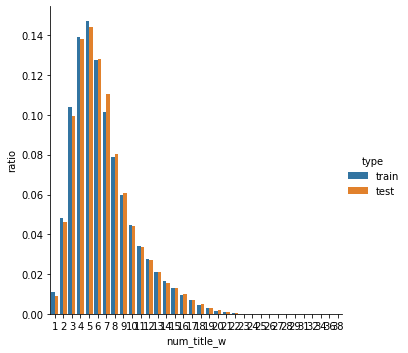

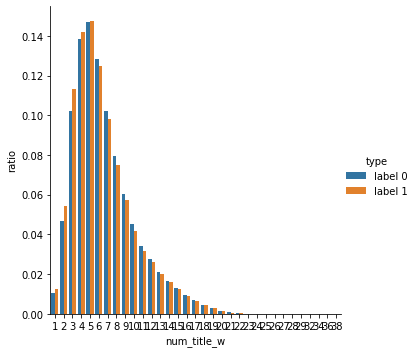

--------------------------------------------------------------------------------
24 num_desc_sw


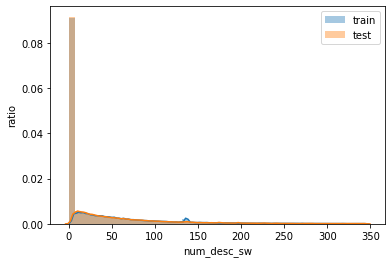

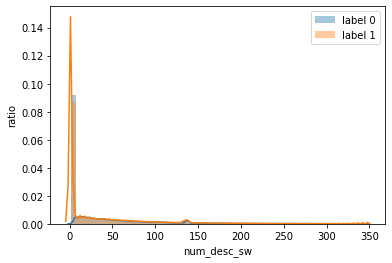

--------------------------------------------------------------------------------
25 num_desc_w


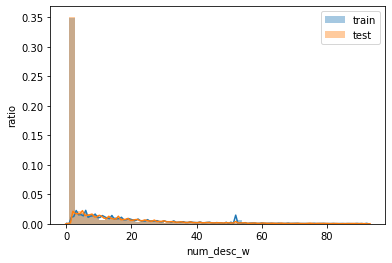

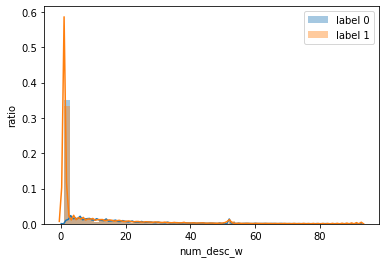

--------------------------------------------------------------------------------
26 num_qtopic


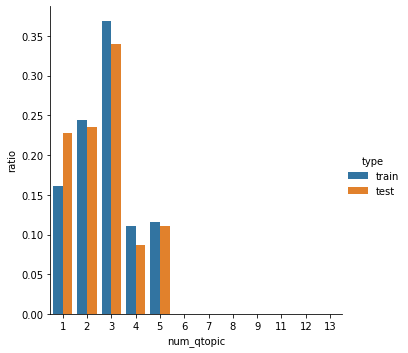

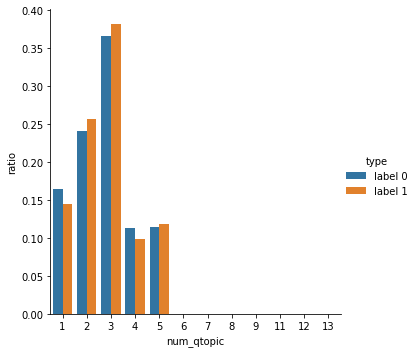

--------------------------------------------------------------------------------
27 qhour


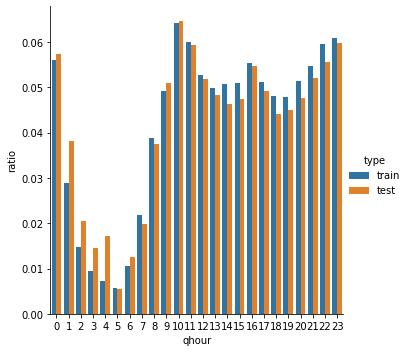

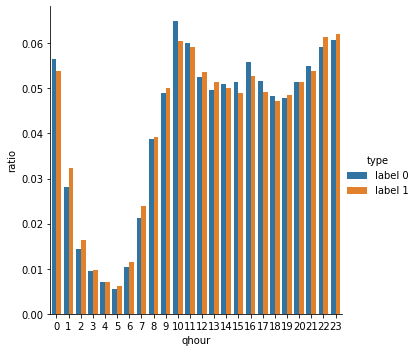

--------------------------------------------------------------------------------
28 inv_que_gap


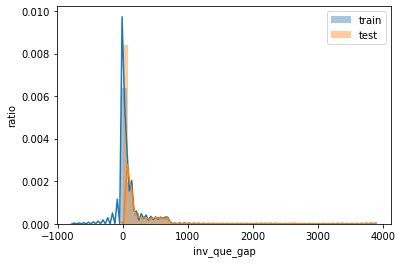

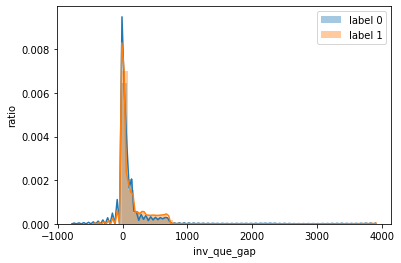

--------------------------------------------------------------------------------
29 num_topic_a_com


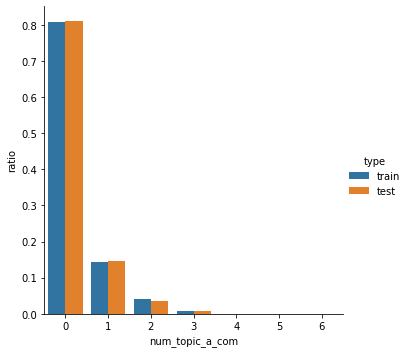

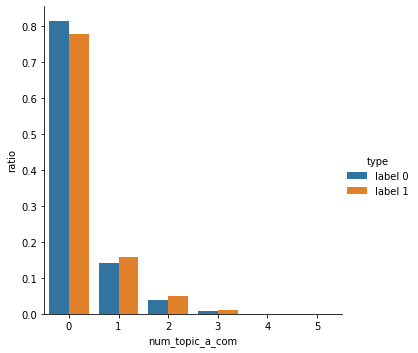

--------------------------------------------------------------------------------
30 num_topic_i_com


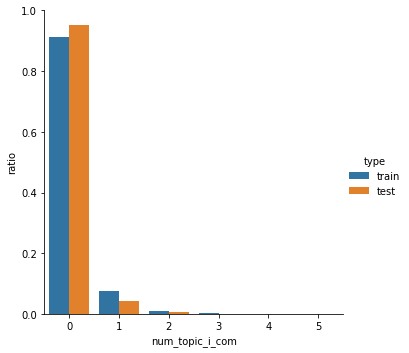

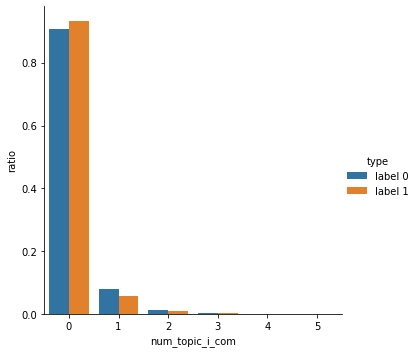

--------------------------------------------------------------------------------
31 min_topic_iv_com


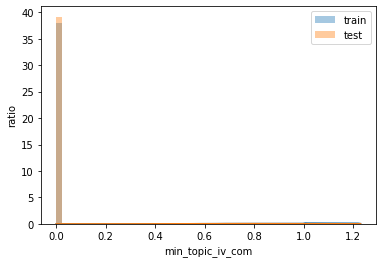

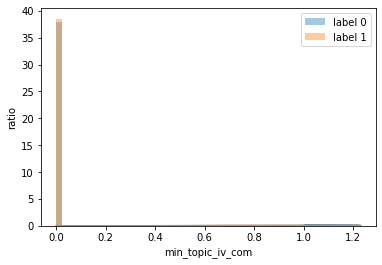

--------------------------------------------------------------------------------
32 max_topic_iv_com


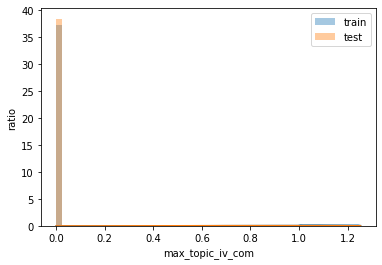

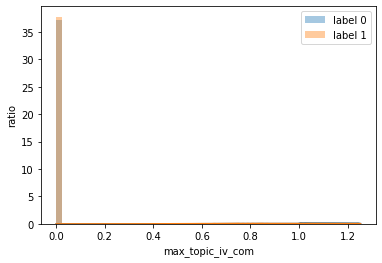

--------------------------------------------------------------------------------
33 mean_topic_iv_com


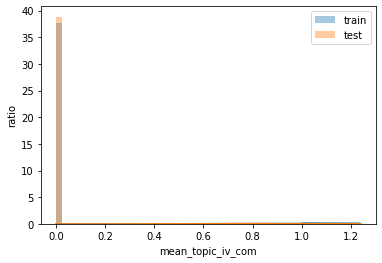

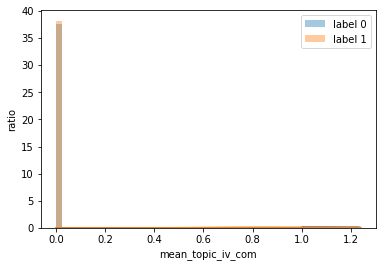

--------------------------------------------------------------------------------
34 std_topic_iv_com


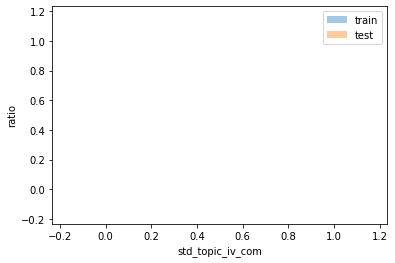

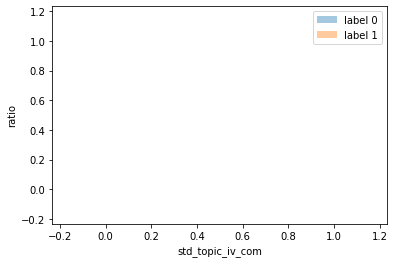

--------------------------------------------------------------------------------
35 user_cnt


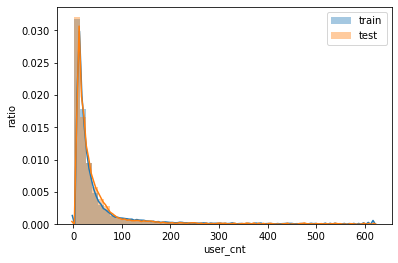

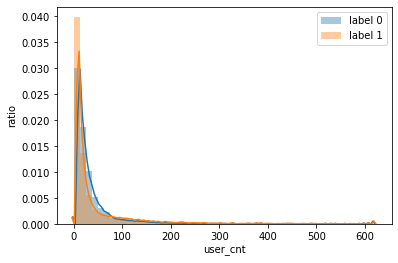

--------------------------------------------------------------------------------
36 question_cnt


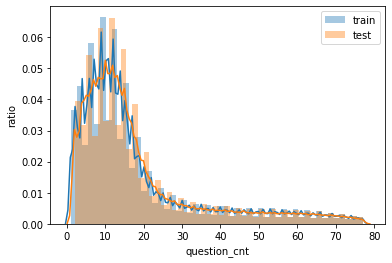

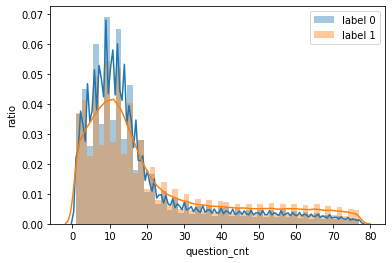

--------------------------------------------------------------------------------
37 question_curr_expo


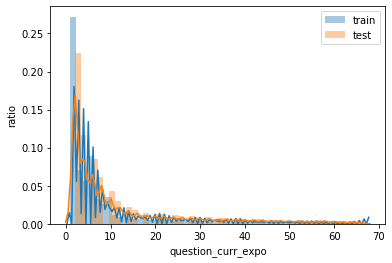

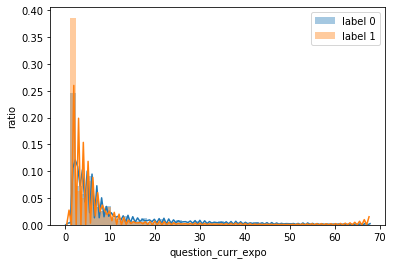

--------------------------------------------------------------------------------
38 question_history_expo


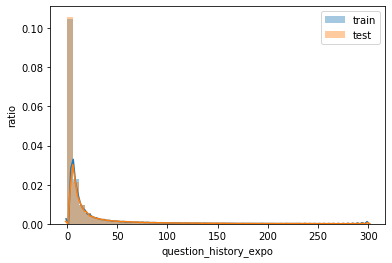

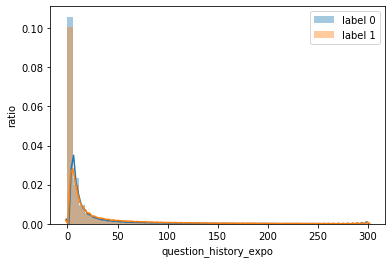

--------------------------------------------------------------------------------
39 question_future_expo


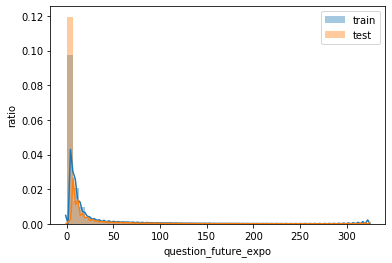

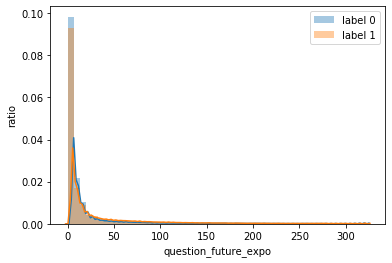

--------------------------------------------------------------------------------
40 user_history_expo


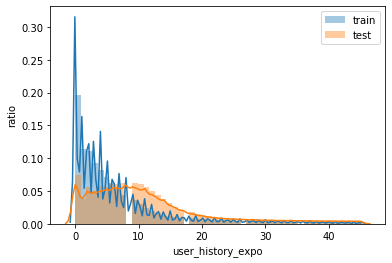

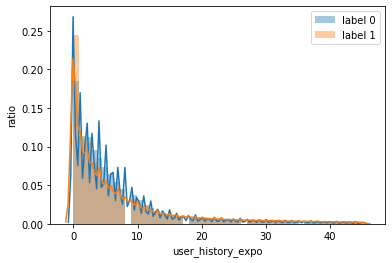

--------------------------------------------------------------------------------
41 user_future_expo


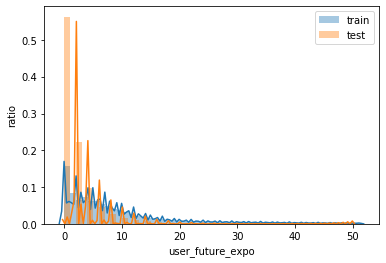

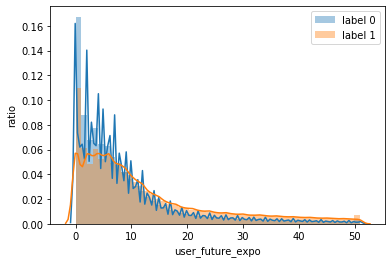

--------------------------------------------------------------------------------
42 prev_excellent_sum


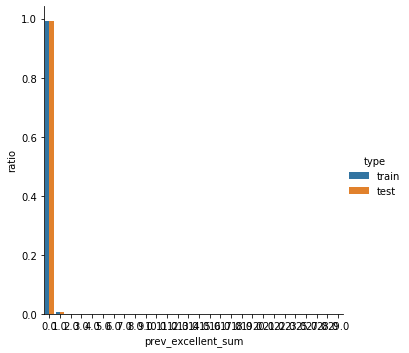

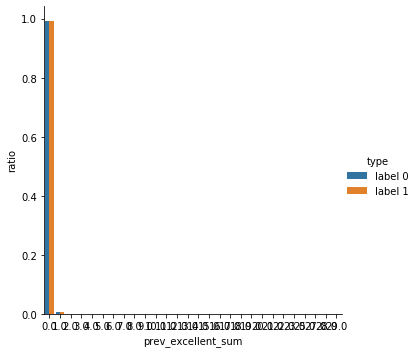

--------------------------------------------------------------------------------
43 prev_recommend_sum


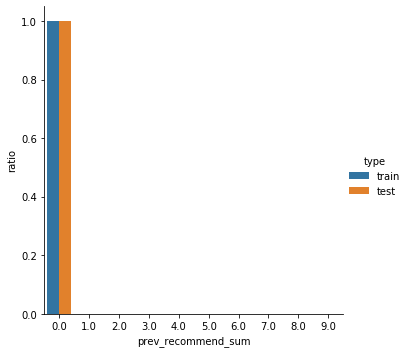

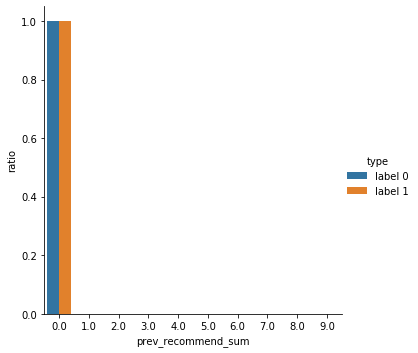

--------------------------------------------------------------------------------
44 prev_figure_sum


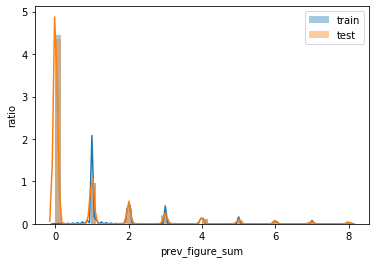

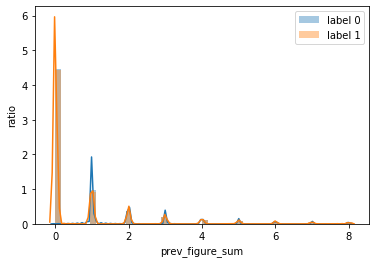

--------------------------------------------------------------------------------
45 prev_video_sum


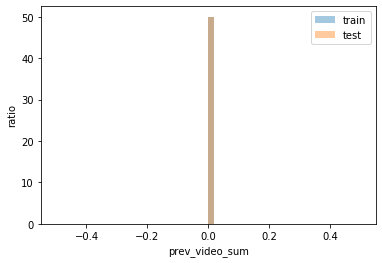

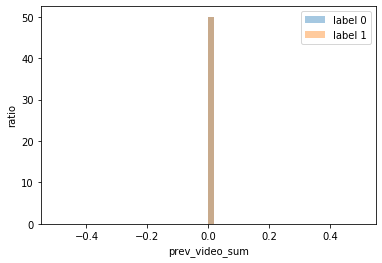

--------------------------------------------------------------------------------
46 prev_num_word_sum


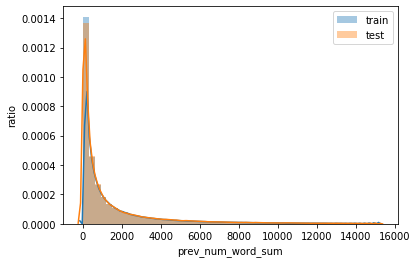

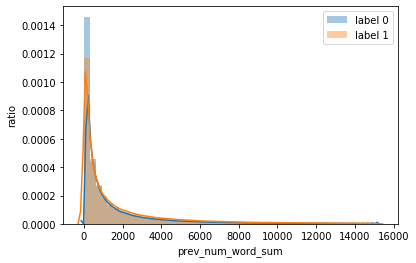

--------------------------------------------------------------------------------
47 prev_num_like_sum


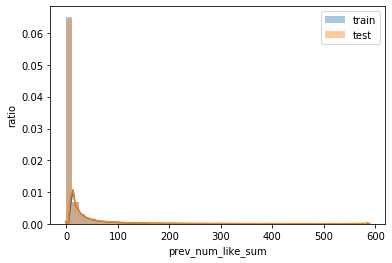

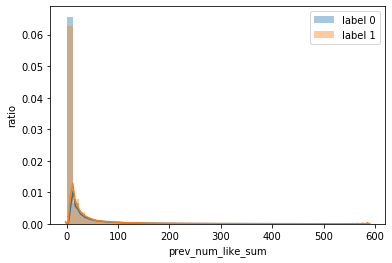

--------------------------------------------------------------------------------
48 prev_num_unlike_sum


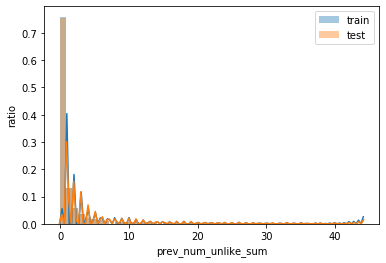

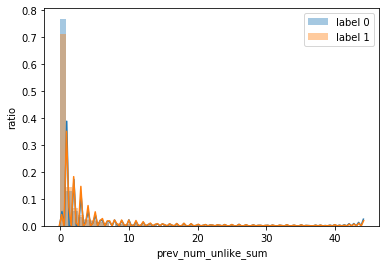

--------------------------------------------------------------------------------
49 prev_num_comment_sum


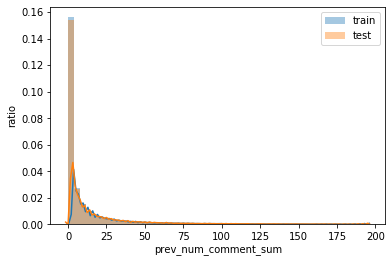

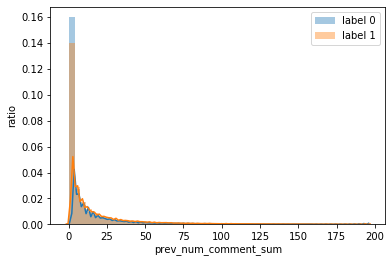

--------------------------------------------------------------------------------
50 prev_num_favor_sum


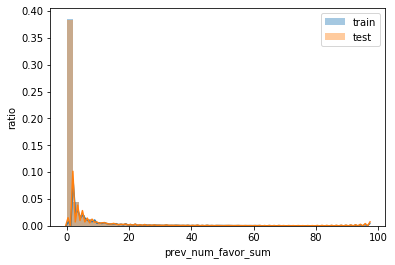

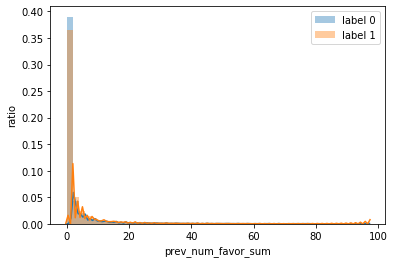

--------------------------------------------------------------------------------
51 prev_num_thank_sum


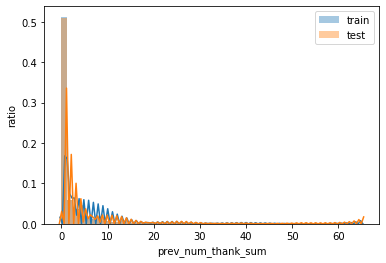

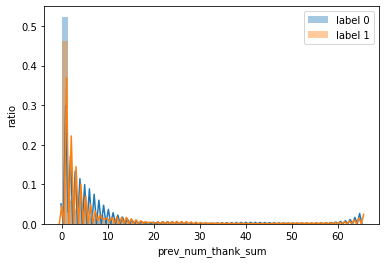

--------------------------------------------------------------------------------
52 prev_num_report_sum


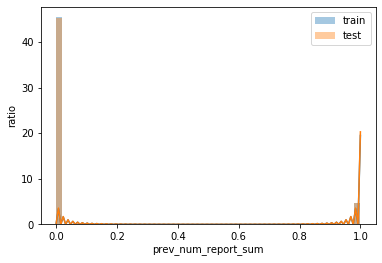

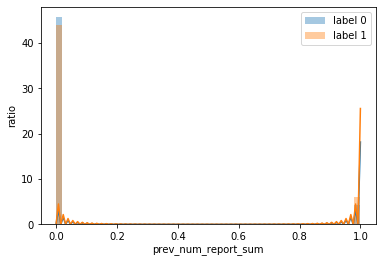

--------------------------------------------------------------------------------
53 prev_num_nohelp_sum


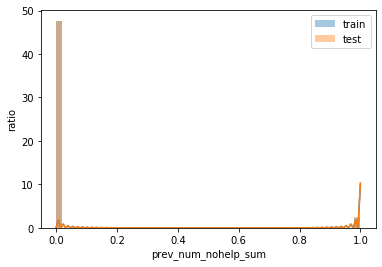

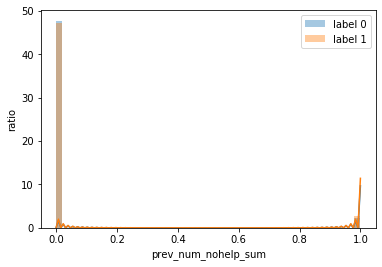

--------------------------------------------------------------------------------
54 prev_num_oppose_sum


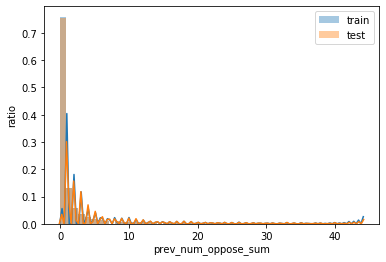

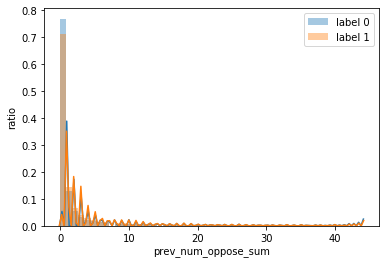

--------------------------------------------------------------------------------
55 prev_cnt_sum


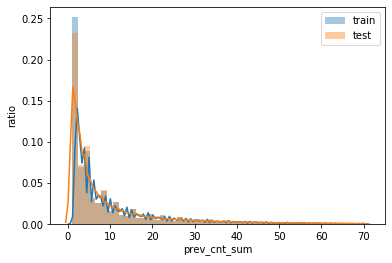

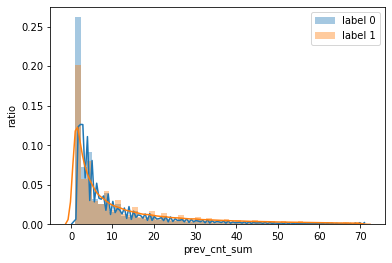

--------------------------------------------------------------------------------
56 prev_excellent_mean


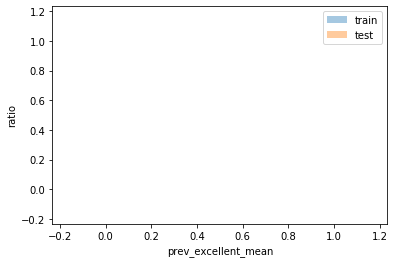

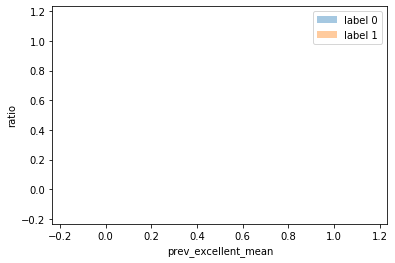

--------------------------------------------------------------------------------
57 prev_recommend_mean


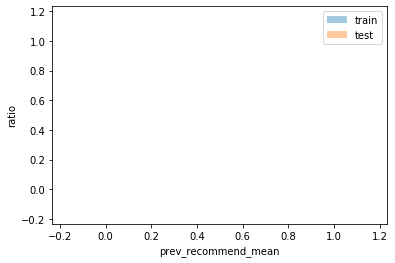

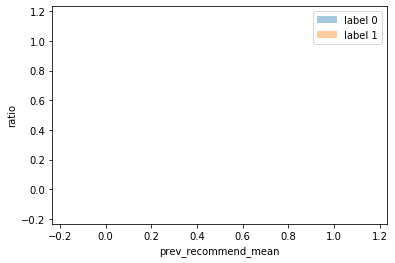

--------------------------------------------------------------------------------
58 prev_figure_mean


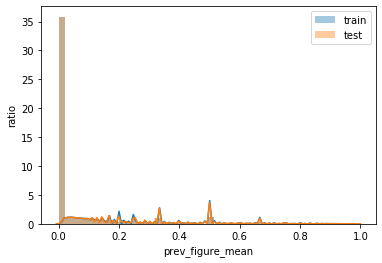

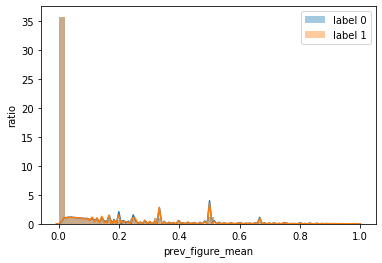

--------------------------------------------------------------------------------
59 prev_video_mean


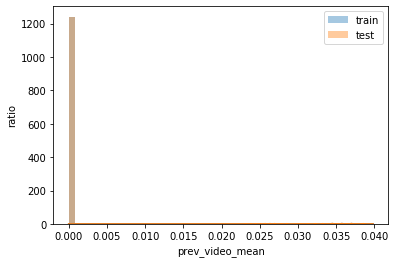

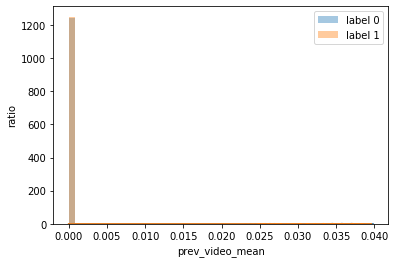

--------------------------------------------------------------------------------
60 prev_num_word_mean


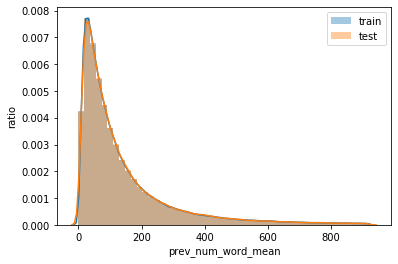

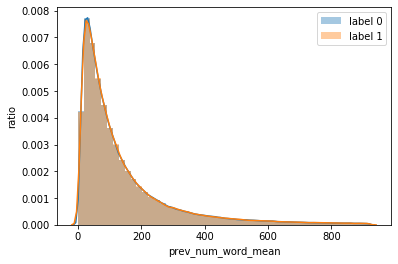

--------------------------------------------------------------------------------
61 prev_num_like_mean


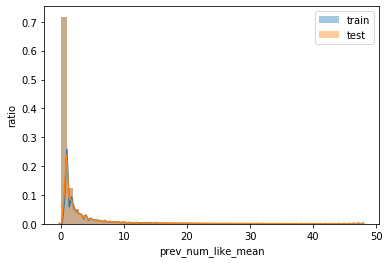

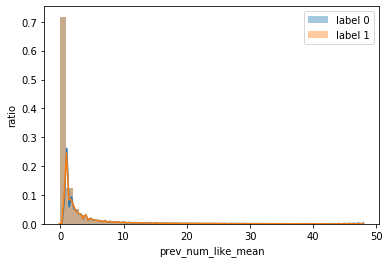

--------------------------------------------------------------------------------
62 prev_num_unlike_mean


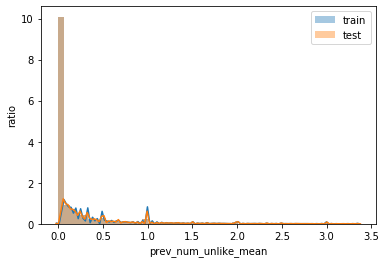

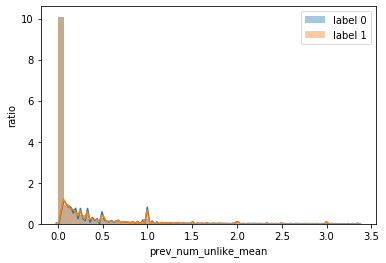

--------------------------------------------------------------------------------
63 prev_num_comment_mean


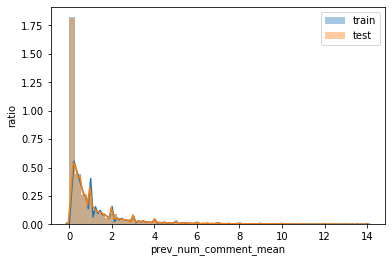

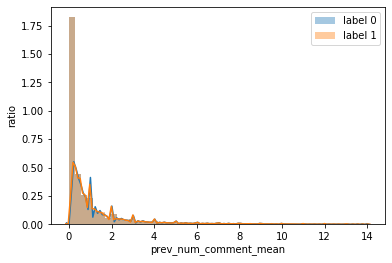

--------------------------------------------------------------------------------
64 prev_num_favor_mean


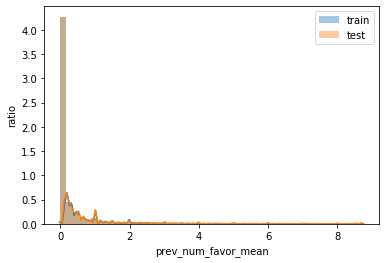

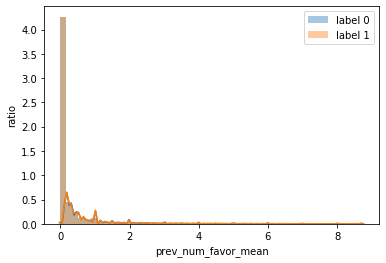

--------------------------------------------------------------------------------
65 prev_num_thank_mean


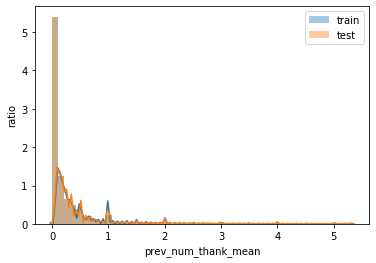

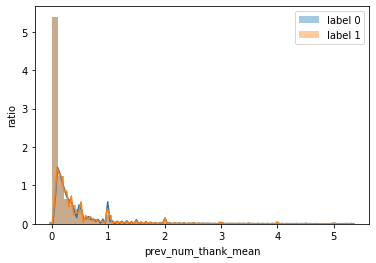

--------------------------------------------------------------------------------
66 prev_num_report_mean


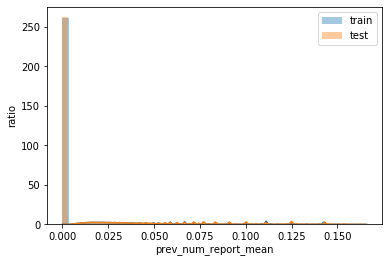

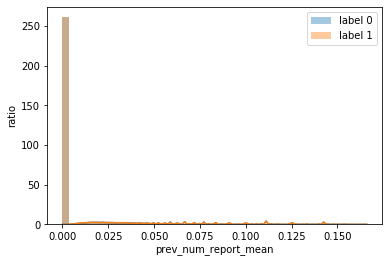

--------------------------------------------------------------------------------
67 prev_num_nohelp_mean


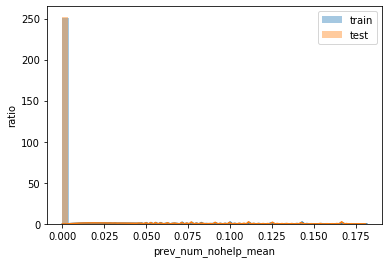

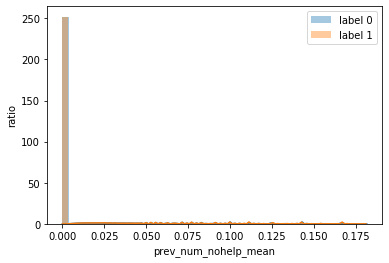

--------------------------------------------------------------------------------
68 prev_num_oppose_mean


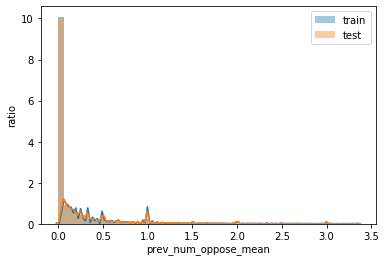

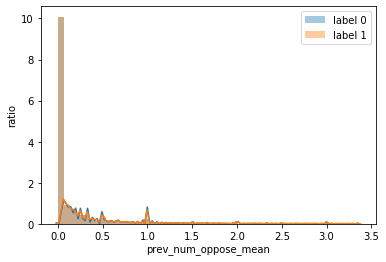

--------------------------------------------------------------------------------
69 prev_ans_times_min


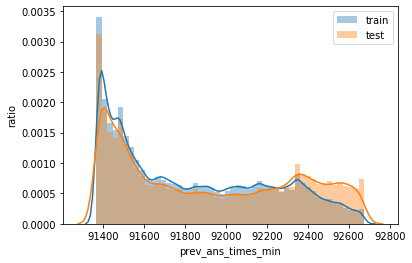

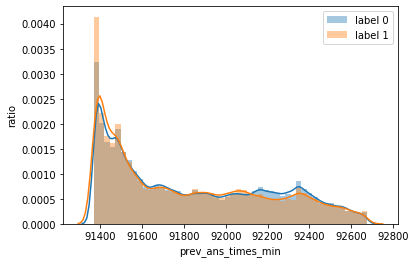

--------------------------------------------------------------------------------
70 prev_ans_times_mean


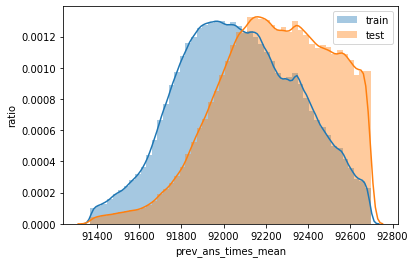

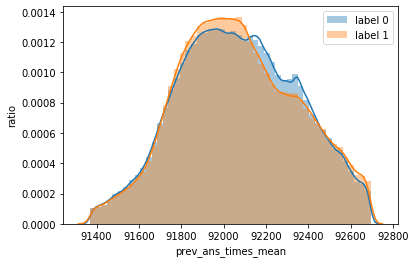

--------------------------------------------------------------------------------
71 prev_ans_times_std


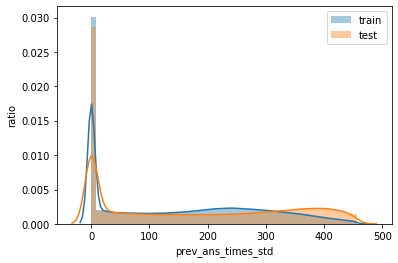

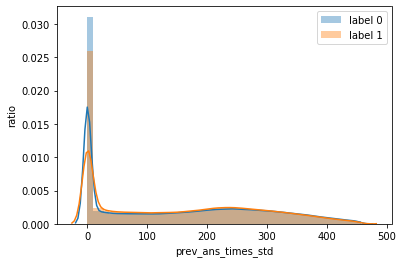

--------------------------------------------------------------------------------
72 prev_ans_times_min_gap


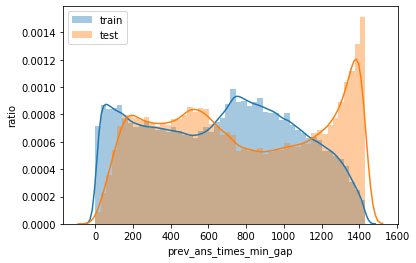

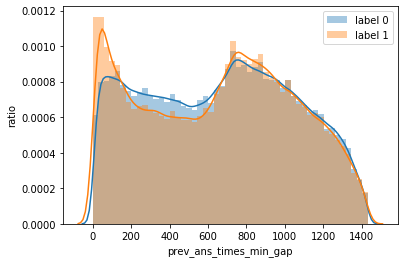

--------------------------------------------------------------------------------
73 prev_ans_times_mean_gap


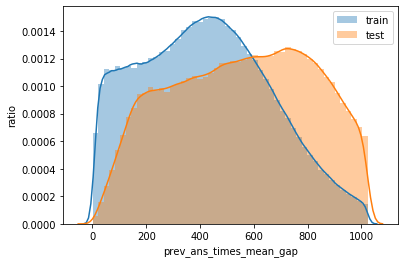

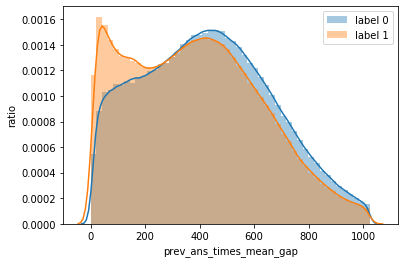

--------------------------------------------------------------------------------
74 qtime_std


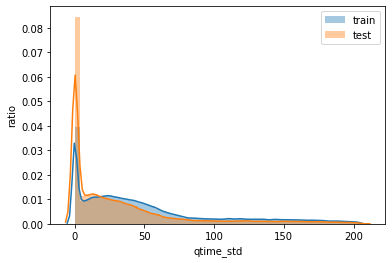

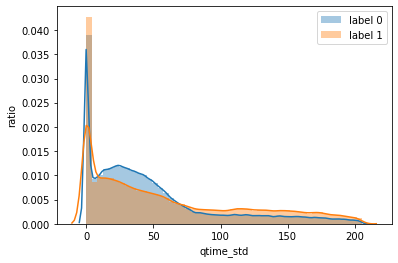

--------------------------------------------------------------------------------
75 qtime_mean


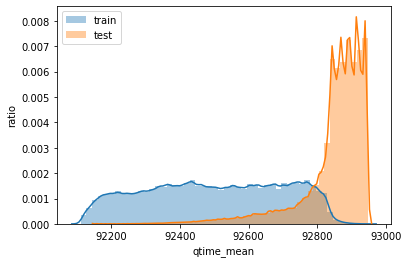

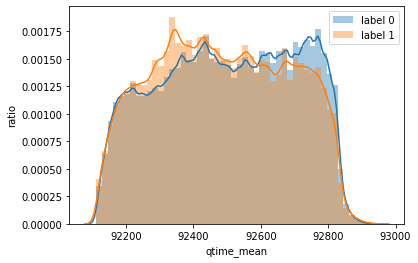

--------------------------------------------------------------------------------
76 utime_std


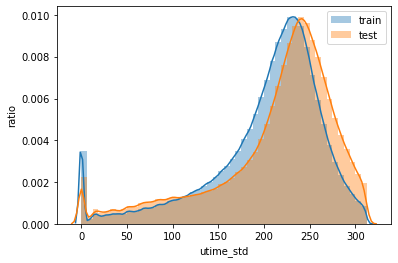

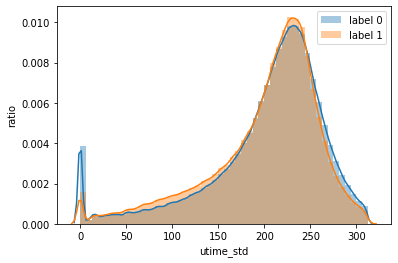

--------------------------------------------------------------------------------
77 utime_mean


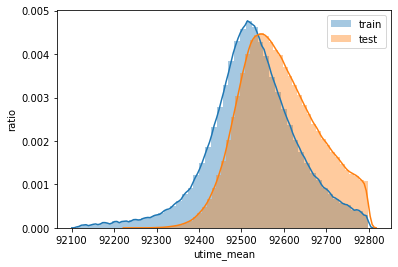

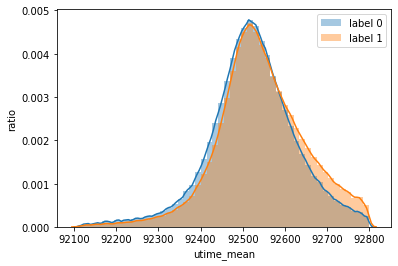

--------------------------------------------------------------------------------
78 iweek


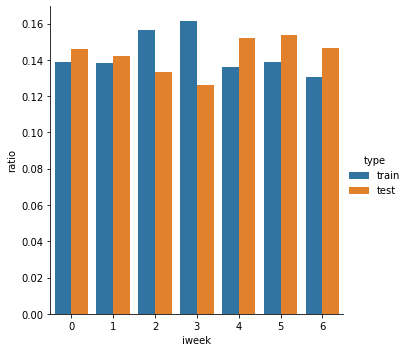

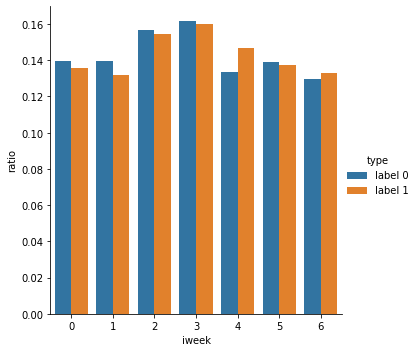

--------------------------------------------------------------------------------
79 qlast_itime_gap


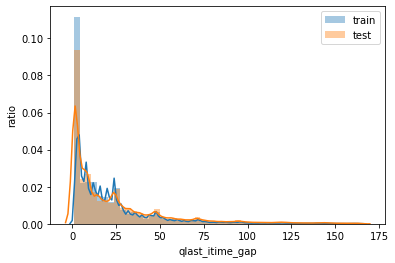

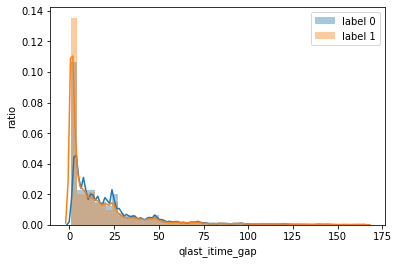

--------------------------------------------------------------------------------
80 qllast_itime_gap


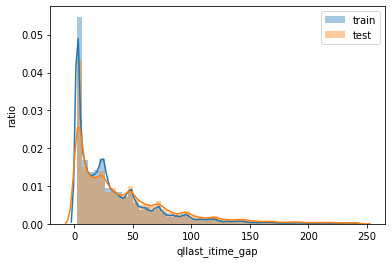

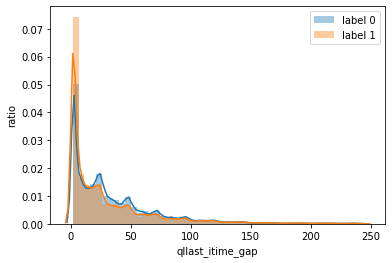

--------------------------------------------------------------------------------
81 qlllast_itime_gap


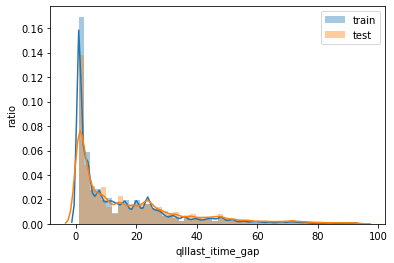

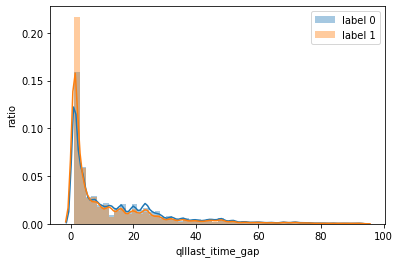

--------------------------------------------------------------------------------
82 qnext_itime_gap


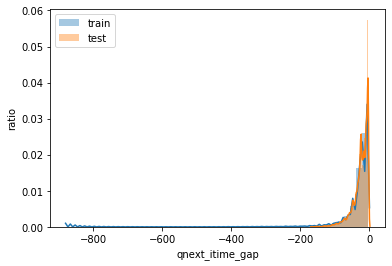

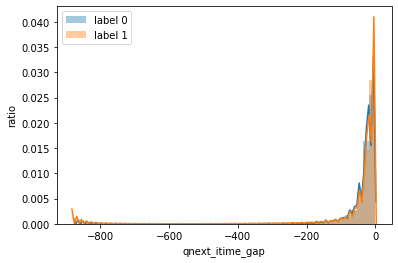

--------------------------------------------------------------------------------
83 qnnext_itime_gap


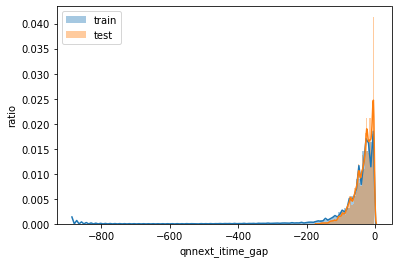

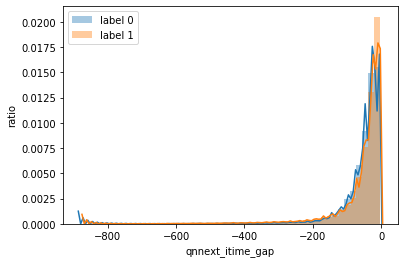

--------------------------------------------------------------------------------
84 qnnnext_itime_gap


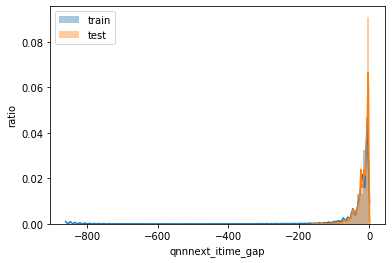

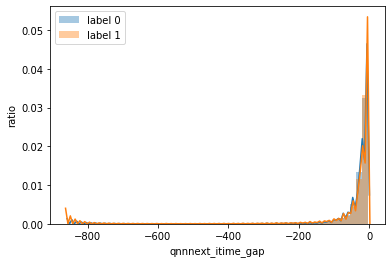

--------------------------------------------------------------------------------
85 ulast_itime_gap


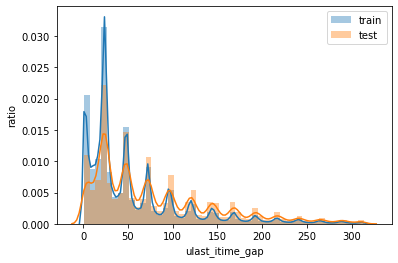

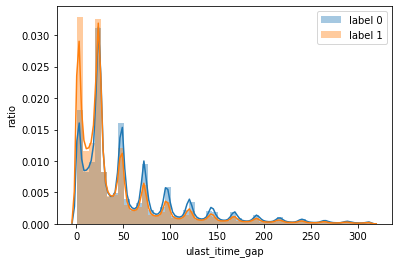

--------------------------------------------------------------------------------
86 ullast_itime_gap


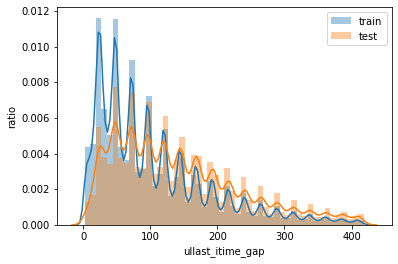

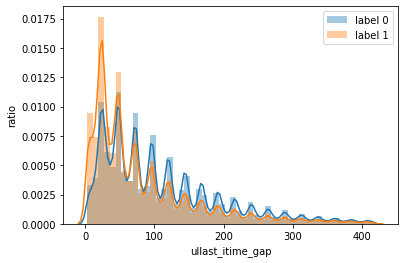

--------------------------------------------------------------------------------
87 ulllast_itime_gap


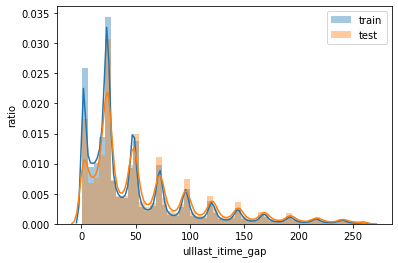

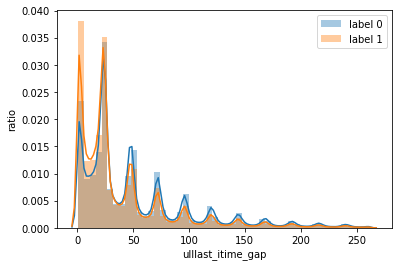

--------------------------------------------------------------------------------
88 unext_itime_gap


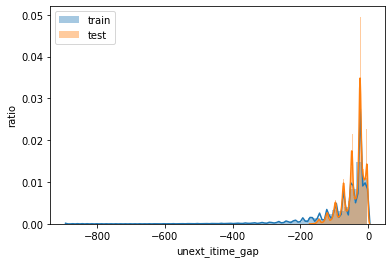

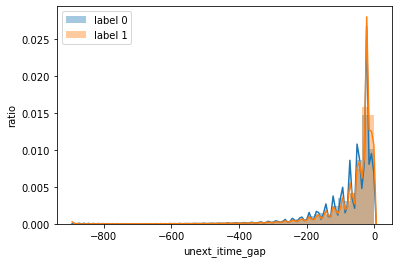

--------------------------------------------------------------------------------
89 unnext_itime_gap


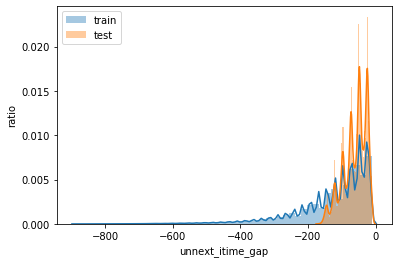

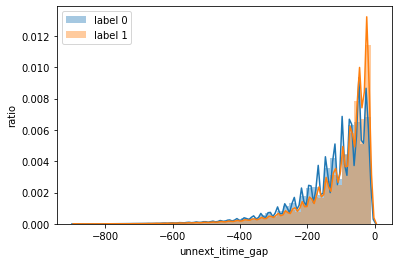

--------------------------------------------------------------------------------
90 unnnext_itime_gap


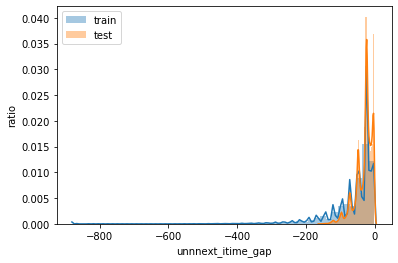

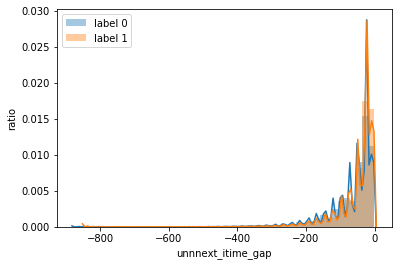

--------------------------------------------------------------------------------
91 question_history_accept


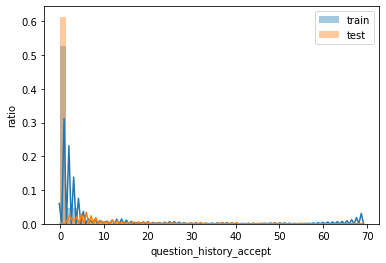

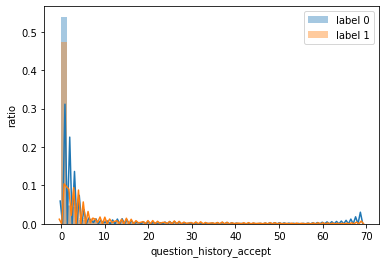

--------------------------------------------------------------------------------
92 question_history_accept_rate


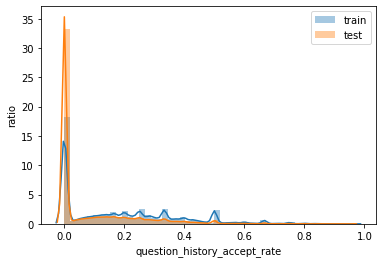

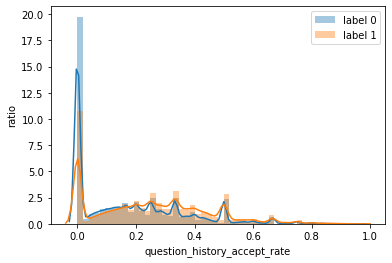

--------------------------------------------------------------------------------
93 user_history_accept


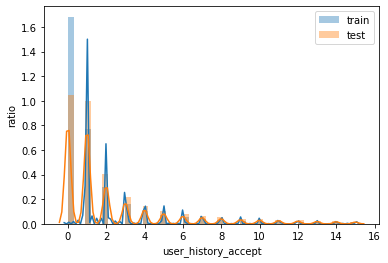

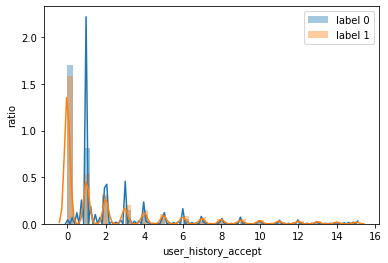

--------------------------------------------------------------------------------
94 user_history_accept_rate


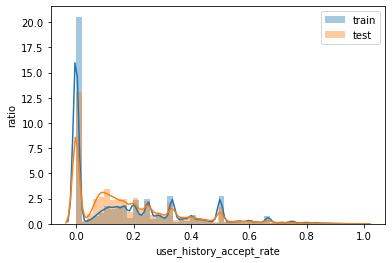

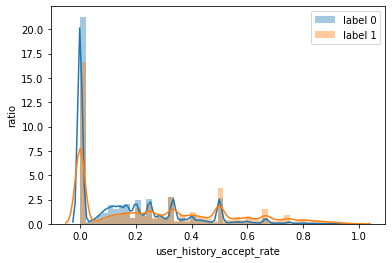

--------------------------------------------------------------------------------
95 topic_a_sims_min


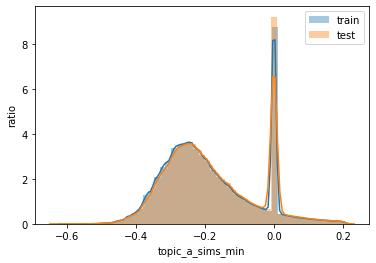

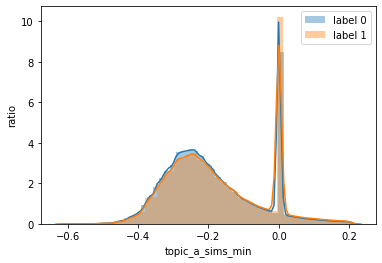

--------------------------------------------------------------------------------
96 topic_a_sims_max


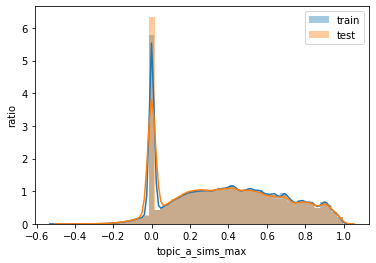

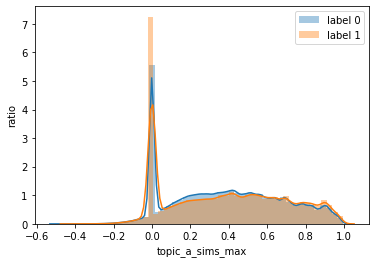

--------------------------------------------------------------------------------
97 topic_a_sims_mean


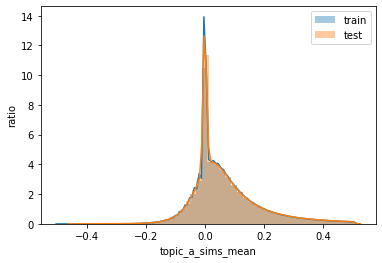

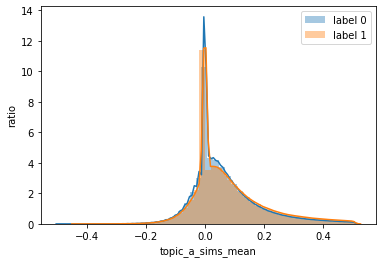

--------------------------------------------------------------------------------
98 topic_a_sims_std


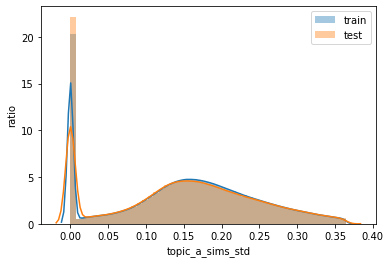

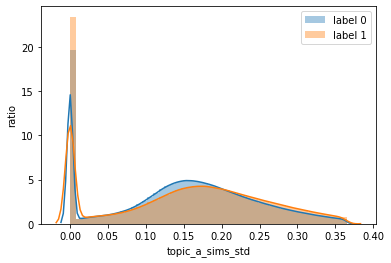

--------------------------------------------------------------------------------
99 topic_i_sims_min


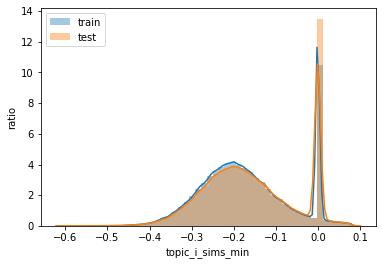

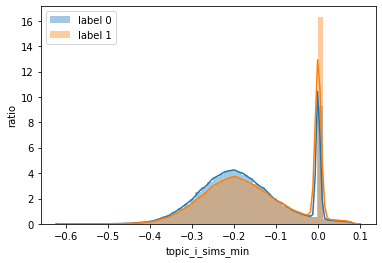

--------------------------------------------------------------------------------
100 topic_i_sims_max


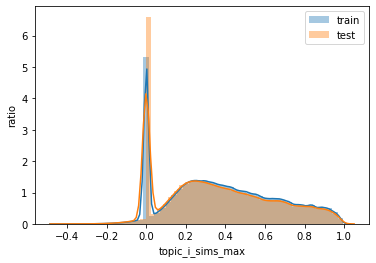

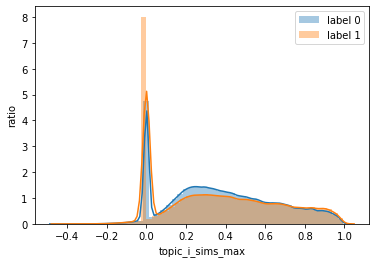

--------------------------------------------------------------------------------
101 topic_i_sims_mean


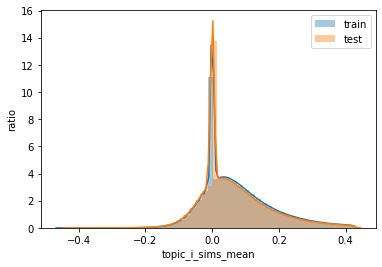

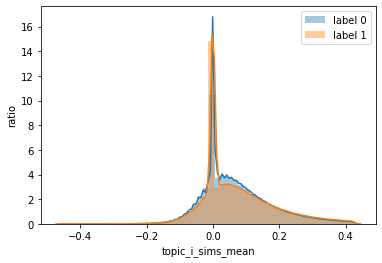

--------------------------------------------------------------------------------
102 topic_i_sims_std


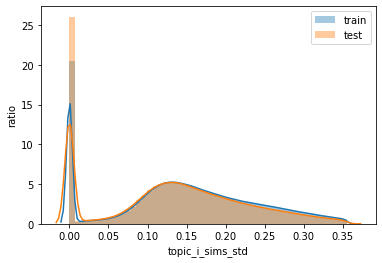

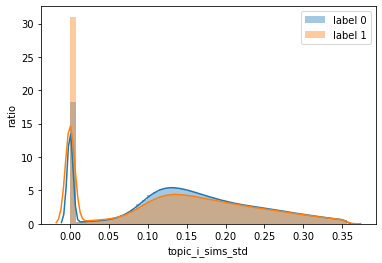

--------------------------------------------------------------------------------
103 prev_topic_sims_min


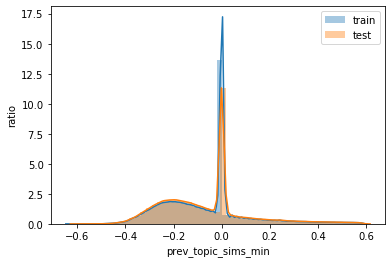

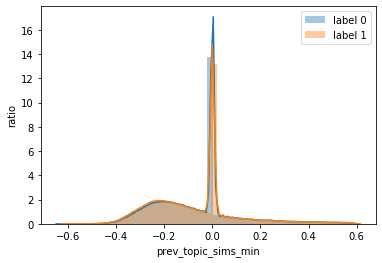

--------------------------------------------------------------------------------
104 prev_topic_sims_max


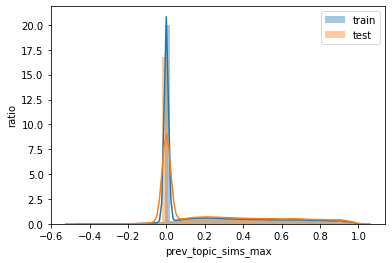

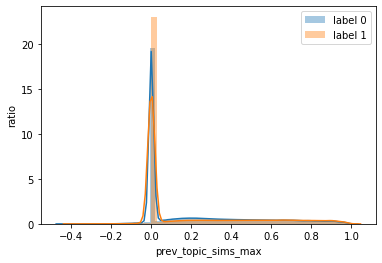

--------------------------------------------------------------------------------
105 prev_topic_sims_mean


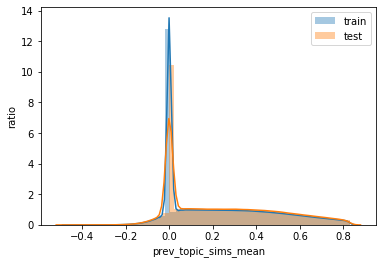

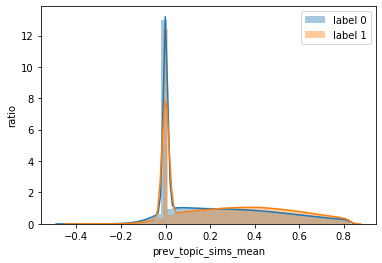

--------------------------------------------------------------------------------
106 prev_topic_sims_std


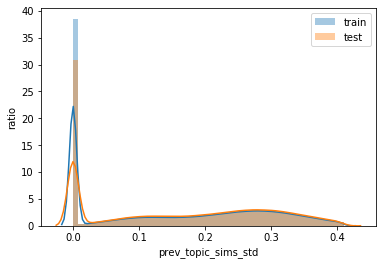

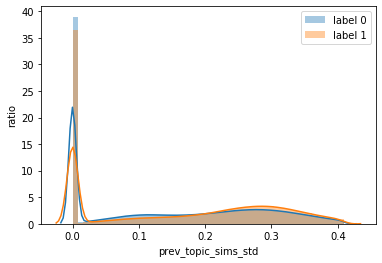

--------------------------------------------------------------------------------
107 ques_topic_dnn_enc_A


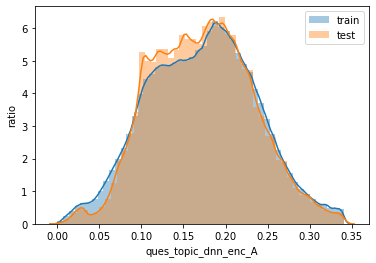

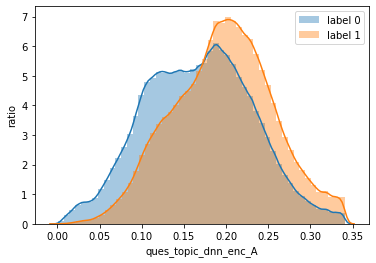

--------------------------------------------------------------------------------
108 ques_topic_dnn_enc_B


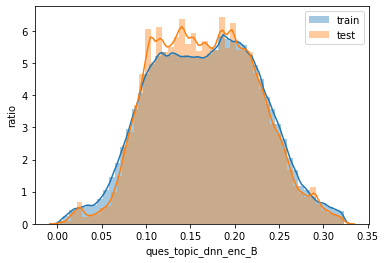

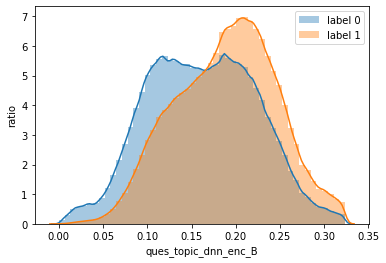

--------------------------------------------------------------------------------
109 ques_topic_dnn_enc_C


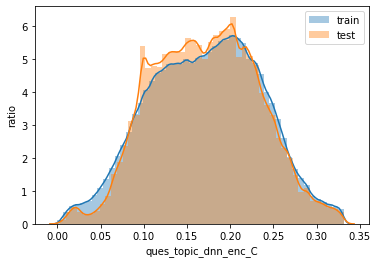

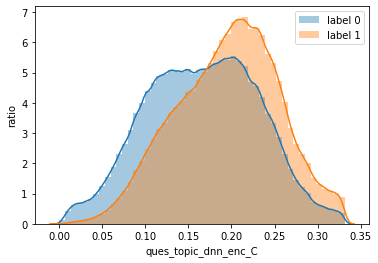

--------------------------------------------------------------------------------
110 user_topic_dnn_enc_A


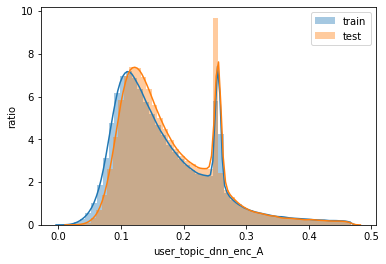

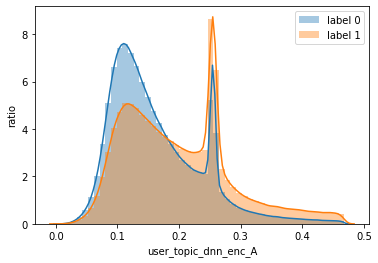

--------------------------------------------------------------------------------
111 user_topic_dnn_enc_B


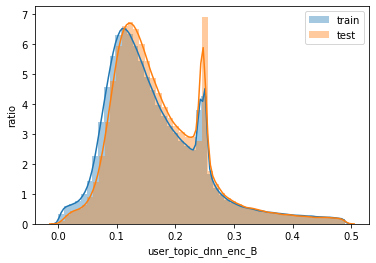

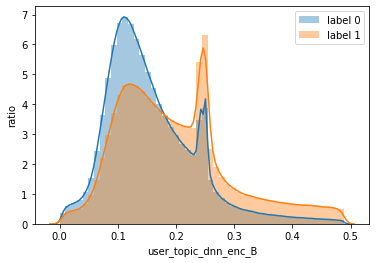

--------------------------------------------------------------------------------
112 user_topic_dnn_enc_C


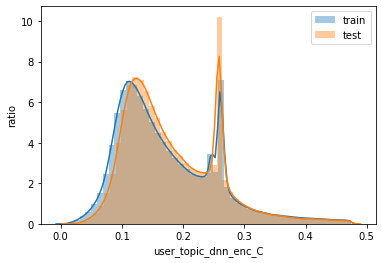

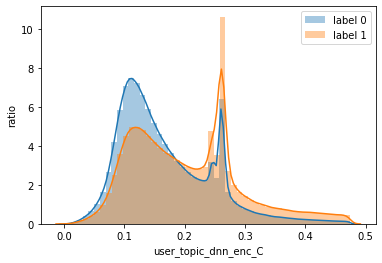

--------------------------------------------------------------------------------
113 user_ques_topic_dnn_enc_A


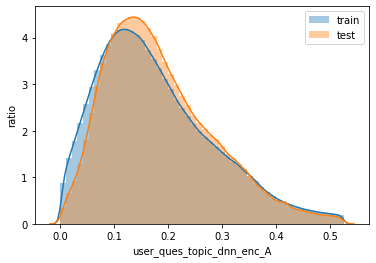

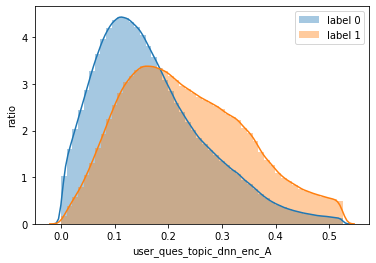

--------------------------------------------------------------------------------
114 user_ques_topic_dnn_enc_B


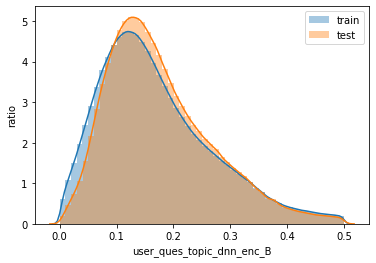

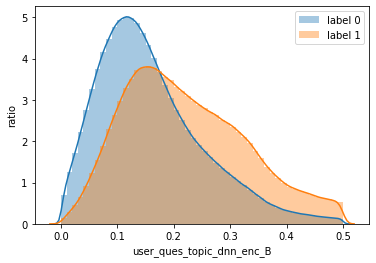

--------------------------------------------------------------------------------
115 user_ques_topic_dnn_enc_C


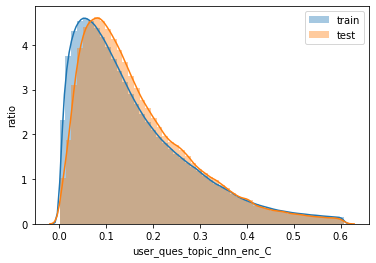

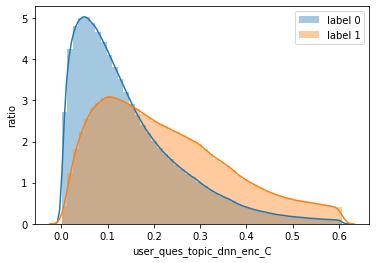

--------------------------------------------------------------------------------
116 title_desc_textcnn_enc


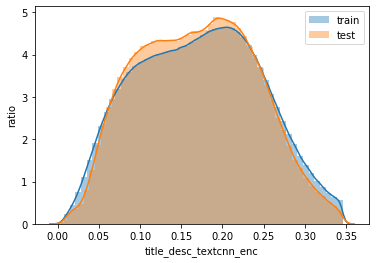

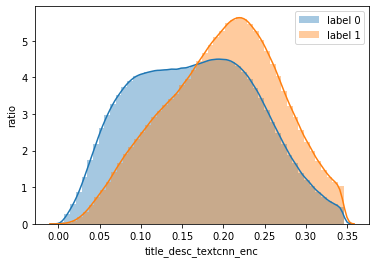

--------------------------------------------------------------------------------
117 title_desc_textattbirnn_enc


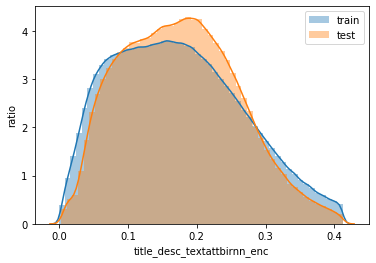

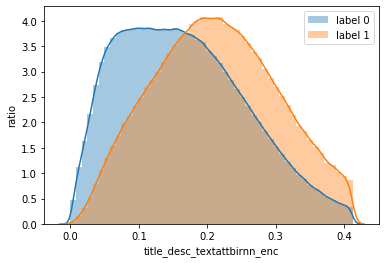

--------------------------------------------------------------------------------
118 ques_user_title_desc_textattbirnn_enc


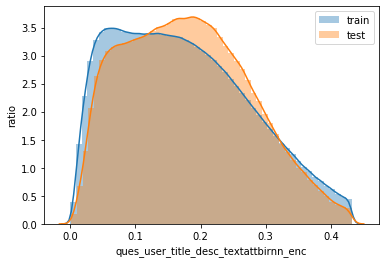

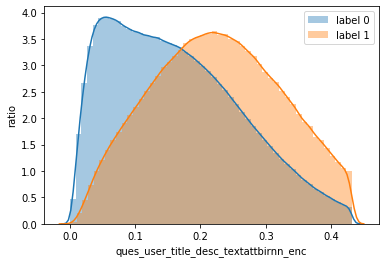

In [13]:
#119
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


for i, feat in enumerate(used_feats):
    print('-'*80)
    print(i, feat)
    n = data[feat].nunique()
    if n > 50:
#         plt.subplots(figsize=(10, 5))
#         plt.subplot(1,2,1)
        trn_dat = train[feat].values
        test_dat = test[feat].values
        q95 = data[feat].quantile(0.975)
        dd = [trn_dat, test_dat]
        dd1 = []
        for d in dd:
            d = d[~np.isnan(d)]
            d = d[~np.isinf(d)]
            d = d[d < q95]
            dd1.append(d)
        trn_dat, test_dat = dd1
        sns.distplot(trn_dat, label='train').legend()
        sns.distplot(test_dat, label='test').legend()
        plt.ylabel('ratio')
        plt.xlabel(feat)
        plt.show()
        ##
#         plt.subplot(1,2,2)
        dat0 = tr0[feat].values
        dat1 = tr1[feat].values
        dd = [dat0, dat1]
        dd1 = []
        for d in dd:
            d = d[~np.isnan(d)]
            d = d[~np.isinf(d)]
            d = d[d < q95]
            dd1.append(d)
        dat0, dat1 = dd1
        sns.distplot(dat0, label='label 0').legend()
        sns.distplot(dat1, label='label 1').legend()
        plt.ylabel('ratio')
        plt.xlabel(feat)
        plt.show()
    else:
        trn_dat = train[feat].value_counts(normalize=True)
        test_dat = test[feat].value_counts(normalize=True)
        trn_dat = pd.DataFrame(trn_dat).reset_index()
        trn_dat['type'] = 'train'
        test_dat = pd.DataFrame(test_dat).reset_index()
        test_dat['type'] = 'test'
        tt_dat= pd.concat([trn_dat, test_dat])
        g = sns.catplot(x="index", y=feat, hue="type", data=tt_dat,kind="bar")
        g.set_xlabels(feat)
        g.set_ylabels("ratio")
        plt.show()
        ##
        dat0 = tr0[feat].value_counts(normalize=True)
        dat1 = tr1[feat].value_counts(normalize=True)
        dat0 = pd.DataFrame(dat0).reset_index()
        dat0['type'] = 'label 0'
        dat1 = pd.DataFrame(dat1).reset_index()
        dat1['type'] = 'label 1'
        tt_dat= pd.concat([dat0, dat1])
        g = sns.catplot(x="index", y=feat, hue="type", data=tt_dat,kind="bar")
        g.set_xlabels(feat)
        g.set_ylabels("ratio")
        plt.show()
        
#     break